# Assignment 2 Question 2

MIT2018020 Aadithya

2.Use HP data to implement LWR .You may take neighbouring batch size of data.Discuss what will happen when tau is very small.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Housing Price data set.csv")
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [3]:
df.dtypes

Unnamed: 0      int64
price         float64
lotsize         int64
bedrooms        int64
bathrms         int64
stories         int64
driveway       object
recroom        object
fullbase       object
gashw          object
airco          object
garagepl        int64
prefarea       object
dtype: object

# Removing Catogorical features

In [4]:
data = df.loc[:, ['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]
price = df.loc[:, ['price']]

In [5]:
data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,5850,3,1,2,1
1,4000,2,1,1,0
2,3060,3,1,1,0
3,6650,3,1,2,0
4,6360,2,1,1,0


# Normalising

In [6]:
mean = data.mean()
std  = data.std()
normalized_data = (data - mean) / std

In [7]:
normalized_data.head()

,lotsize,bedrooms,bathrms,stories,garagepl
0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [8]:
normalized_data['bias'] = np.ones(normalized_data.shape[0])
x = normalized_data.loc[:,['bias', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl']]

In [9]:
x.head()

,bias,lotsize,bedrooms,bathrms,stories,garagepl
0,1.0,0.322732,0.047192,-0.568973,0.221501,0.357239
1,1.0,-0.530526,-1.308947,-0.568973,-0.930304,-0.803788
2,1.0,-0.964074,0.047192,-0.568973,-0.930304,-0.803788
3,1.0,0.691709,0.047192,-0.568973,0.221501,-0.803788
4,1.0,0.557955,-1.308947,-0.568973,-0.930304,-0.803788


In [10]:
x1 = np.array(x.loc[0,:])

In [11]:
w = np.zeros((x.shape[1], 1))

In [12]:
def cost(x1, x, y, w,t = 1):
    m = len(y)
    e = (np.dot(x, w) - y) ** 2
    tau = np.array(np.exp(-1 * np.sum(((x - x1) **2), axis = 1)/(2 * t))).reshape(-1,1)
    return np.sum(np.multiply(tau,e))   

In [13]:
alpha = 0.001
iterations = 10000
y = price
lamb = 500
cost(x1, x, y, w)

price    3.905313e+11
dtype: float64

In [14]:
def gradient_descend(x, y, alpha, x1, iterations, t = 1):
    cost_list = []
    w = np.zeros((x.shape[1],1))

    for i in range(iterations):
        tau = np.array(np.exp(-1 * np.sum(((x - x1) **2), axis = 1)/(2 * t)  )).reshape(-1,1)
        grade = (np.dot(x.T, np.multiply(np.dot(x,w) - y, tau)) ) 
        w = w - alpha * grade
        cost_list.append(cost(x1, x, y, w, t))
    return cost_list, w
    

price    2.354951e+10
dtype: float64
[[69599.09045111]
 [12349.32497916]
 [ 3168.63693338]
 [ 8614.83380576]
 [ 5467.62061051]
 [ 4737.86756509]]
71736.17343861755 price    42000.0
Name: 0, dtype: float64


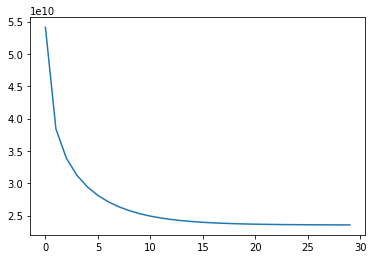

In [15]:
cost_list, w = gradient_descend(x, y, alpha=0.01, x1=x1, iterations=30)
plt.plot(cost_list)
print(cost_list[-1])
print(w)
print(np.matmul(x1,w)[0], y.iloc[0])

price    2.353439e+10
dtype: float64
[[70101.49576509]
 [12317.0156892 ]
 [ 3094.2737349 ]
 [ 9542.51349299]
 [ 5419.85021077]
 [ 4710.26847786]]
71676.37679208904 price    42000.0
Name: 0, dtype: float64


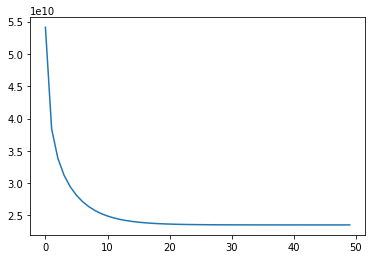

In [16]:
cost_list, w = gradient_descend(x, y, alpha=0.01, x1=x1, iterations=50, t = 1)
plt.plot(cost_list)
print(cost_list[-1])
print(w)
print(np.matmul(x1,w)[0], y.iloc[0])

In [17]:
def avg_error(x, y, w):
    e = np.abs(np.dot(1/y.T,(np.dot(x, w) - y)))
    return (e)[0][0] * 100 / len(y)

In [18]:
avg_error(x, y, w)

8.682839089604279

In [19]:
testx = x[383:]
testy = price[383:]
X = x[:383]
Y = price[:383]
y = np.array(price)


42000.0 -1.1287335752109919e+77
38500.0 -1.1627488128842943e+80
49500.0 -5.7239869313942e+76
60500.0 -1.4176809315573638e+74
61000.0 -8.588640865246467e+74
66000.0 -6.999130789752207e+78
66000.0 -2.2508943895404034e+66
69000.0 -8.625264631089304e+64
83800.0 -5.295198708914391e+78
88500.0 -3.277244781965365e+64
90000.0 -1.341444116009885e+35
30500.0 -1.4194953344506162e+78
27000.0 -3.399696519490342e+69
36000.0 -1.3658073828799685e+76
37000.0 -3.928287566958785e+79
37900.0 -4.915141870837325e+78
40500.0 -4.205531582752548e+76
40750.0 -4.958538443278007e+54
45000.0 -5.682640903438132e+59
45000.0 -1.2590452154944503e+62
48500.0 -1.046957067369554e+79
65900.0 -6.365678003570392e+64
37900.0 -8.380922061311844e+78
38000.0 -1.0340575197909719e+80
42000.0 -4.109438588498095e+79
42300.0 -3.432563350456502e+76
43500.0 -7.56048819564319e+79
44000.0 -4.109438588498095e+79
44500.0 -3.623749068252805e+76
44900.0 -1.9303500594241894e+79
45000.0 -2.602422395588677e+79
48000.0 -3.58310042361746e+49
490

48500.0 -4.5591464084299006e+79
48900.0 -1.2337092563048777e+80
50000.0 -1.87413709416401e+77
51000.0 -4.5591464084299006e+79
52500.0 -8.751346334704635e+77
52500.0 -3.928287566958785e+79
54000.0 -3.928287566958785e+79
59000.0 -1.7543817584906491e+58
60000.0 -2.2932992376838072e+69
63000.0 -3.0891957731067406e+78
64000.0 -2.553929681138036e+54
64900.0 -5.440202131300173e+62
65000.0 -1.9919774310340543e+78
66000.0 -4.491849725157187e+77
70000.0 -4.579460666103186e+56
65500.0 -2.664765309828789e+78
57000.0 -7.39641426120538e+78
52000.0 -9.973595991726739e+76
54000.0 -6.840750854886215e+57
74500.0 -5.248659900221588e+51
90000.0 -9.81305764707609e+65
45000.0 -5.7759946647399956e+72
45000.0 -1.2064129681071272e+53
65000.0 -3.323256111646344e+74
55000.0 -2.1326131878501592e+71
62000.0 -2.016396823349146e+59
30000.0 -4.6073283651785934e+76
34000.0 -7.871198666878765e+78
38000.0 -5.280468083519953e+78
39000.0 -2.664765309828789e+78
45000.0 -6.686651850359432e+75
47000.0 -1.2337092563048777e+80

113000.0 -6.0871054329132544e+63
120000.0 -1.2880794952149605e+58
105000.0 -1.484350065997882e+57
106000.0 -6.344547553137008e+51
107500.0 -1.5366010487278822e+65
108000.0 -2.6438159133861683e+70
113750.0 -7.160691355525257e+43
120000.0 -1.4938735497943397e+43
70000.0 85523.30273781625
71000.0 -7.505100948987548e+65
82000.0 1.1000537910382943e+64
82000.0 -1.212908598007289e+56
82500.0 -1.5898611716890988e+56
83000.0 -3.482781000583044e+64
84000.0 -9.605476118553203e+69
85000.0 -6.162233002308627e+64
85000.0 -1.682396706019948e+65
91500.0 -8.71779095589661e+53
94000.0 -1.5898611716890988e+56
103000.0 -1.5366010487278822e+65
105000.0 -4.341515483532809e+79
105000.0 -2.2241539285326367e+76


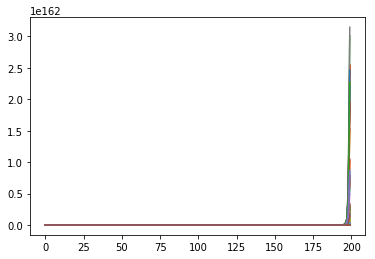

In [20]:
pred = []
for i in range(len(y)):
    cost_list, w = gradient_descend(x, y, alpha=0.005, x1=x.iloc[i,:], iterations=200, t = 10)
    plt.plot(cost_list)
    pred.append(np.matmul(x.iloc[i,:],w)[0])
    print(y[i,0], pred[-1])

In [21]:
np.sum(np.abs(1 - ((np.array(pred).reshape(-1,1))/ y))) * 100 / len(y)

1.4863393222724e+76

error is 1.48e+76% 

42000.0 71670.07393616672
38500.0 47119.76620210169
49500.0 44862.31983348079
60500.0 70197.65441354926
61000.0 54681.903048633096
66000.0 51682.9383751679
66000.0 76316.95482937814
69000.0 67685.84846344226
83800.0 55434.892769433434
88500.0 102280.38672421026
90000.0 95115.05453468887
30500.0 41933.976079469285
27000.0 43142.94557473586
36000.0 43708.137990183386
37000.0 45153.73706482459
37900.0 42956.28810678662
40500.0 56417.62201752521
40750.0 68101.83115477768
45000.0 43397.14042272661
45000.0 59056.5608275202
48500.0 65679.89408015012
65900.0 70689.817151277
37900.0 56057.42234500962
38000.0 46806.778198446555
42000.0 51091.59066755732
42300.0 49091.70215430795
43500.0 46157.119122365424
44000.0 51091.59066755732
44500.0 44478.61795343048
44900.0 58876.15571247522
45000.0 44637.75959386902
48000.0 62502.49127091609
49000.0 47119.76620210169
51500.0 49330.11801971034
61000.0 63191.44845624698
61000.0 55121.488354958616
61700.0 47269.81411429787
67000.0 86972.59810019472
82000.0 

76900.0 81833.50351803724
78000.0 86522.22059161917
80000.0 85915.52967891663
82000.0 72869.07171837956
83000.0 84663.91010160437
83000.0 74083.07963798205
83900.0 81378.10521814997
88500.0 93247.3750403884
93000.0 103729.1978478019
98000.0 68620.45706940358
98500.0 99814.16770000655
99000.0 107294.88908128197
101000.0 66863.57384910328
110000.0 116198.18125465092
115442.0 119329.97958351842
120000.0 82180.63280680052
124000.0 95834.03756424716
175000.0 175937.77263211462
50000.0 62742.643246211206
55000.0 46401.71679208192
60000.0 73152.79940533992
61000.0 63779.908800111574
106000.0 87268.13993357381
155000.0 154127.2291094843
141000.0 109007.2280861739
62500.0 55492.649305709405
70000.0 60217.97822467433
73000.0 50416.64818750158
80000.0 74684.29013231804
80000.0 88796.53601122949
88000.0 82966.5263788438
49000.0 49804.98870753057
52000.0 78492.95738911389
59500.0 61151.86600533554
60000.0 67180.81534856684
64000.0 66412.90759469097
64500.0 72914.11089477042
68500.0 71710.8436174271

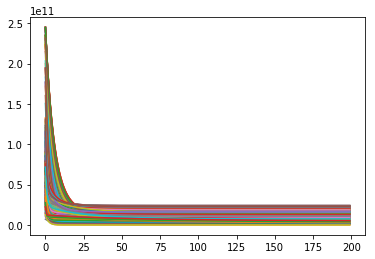

In [22]:
pred = []
for i in range(0,len(y)):
    cost_list, w = gradient_descend(x, y, alpha=0.005, x1=x.iloc[i,:], iterations=200, t = 1)
    plt.plot(cost_list)
    pred.append(np.matmul(x.iloc[i,:],w)[0])
    print(y[i,0], pred[-1])

In [23]:
np.sum(np.abs(1 - ((np.array(pred).reshape(-1,1))/ y))) * 100 / len(y)

18.53391448313888

ie, Average error for t = 1 is 18.53%

42000.0 70630.7161219994
38500.0 48110.10930164413
49500.0 44723.869501333465
60500.0 69104.6620741365
61000.0 50973.86472779518
66000.0 54197.10571697535
66000.0 71472.22889334877
69000.0 70913.076699657
83800.0 56799.45497516511
88500.0 107160.06735933897
90000.0 72986.44662597508
30500.0 42810.293010987545
27000.0 50341.738512349744
36000.0 43542.27733495481
37000.0 45681.11747779284
37900.0 43480.48784359908
40500.0 57426.11847168647
40750.0 53522.87058609769
45000.0 40074.76429185468
45000.0 44603.18435823049
48500.0 60368.204396077745
65900.0 70513.17451267925
37900.0 53003.11308809668
38000.0 47720.489785849015
42000.0 52223.177386628035
42300.0 51490.66147652349
43500.0 46907.03384562842
44000.0 52223.177386628035
44500.0 44302.903388654755
44900.0 56032.04472592585
45000.0 45088.568072190516
48000.0 60072.210062629165
49000.0 48110.10930164413
51500.0 50642.919890359975
61000.0 65429.549064609644
61000.0 52885.235746275575
61700.0 48295.44792203112
67000.0 81961.86146234178
82

75000.0 76885.4840279713
76900.0 83981.685559176
78000.0 80536.74444810505
80000.0 82528.78478416633
82000.0 79240.2661945238
83000.0 80473.42402710265
83000.0 80438.28102175648
83900.0 85992.30552221453
88500.0 93321.56653227867
93000.0 94453.14367174647
98000.0 76895.25062946856
98500.0 109692.30403504142
99000.0 98250.91436516424
101000.0 73846.69502543517
110000.0 112277.37479036793
115442.0 115511.46522035476
120000.0 103689.09396560233
124000.0 107622.155457834
175000.0 175000.00000003667
50000.0 55491.34316496085
55000.0 47213.157867019
60000.0 59830.77161152475
61000.0 56069.29624862947
106000.0 90295.5902311794
155000.0 154999.67866378627
141000.0 127902.4220181745
62500.0 52709.29997214438
70000.0 58544.628948719255
73000.0 52094.431421001646
80000.0 72507.5576042222
80000.0 96161.15253261809
88000.0 84274.3702257663
49000.0 51657.402778007156
52000.0 73213.01722917557
59500.0 58677.6695052479
60000.0 69970.65499618983
64000.0 72428.66641055384
64500.0 65145.58358176337
68500

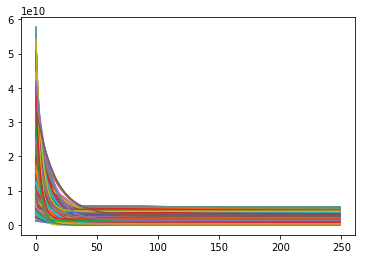

In [24]:
pred = []
for i in range(len(y)):
    cost_list, w = gradient_descend(x, y, alpha=0.003, x1=x.iloc[i,:], iterations=250, t = 1/10)
    plt.plot(cost_list)
    pred.append(np.matmul(x.iloc[i,:],w)[0])
    print(y[i,0], pred[-1])

In [25]:
np.sum(np.abs(1 - np.abs((np.array(pred).reshape(-1,1))/ y))) * 100 / len(y)

14.826241468854315

ie, Average error is 14.82% for t = 1/10

42000.0 74299.76086748745
38500.0 48804.747350475984
49500.0 41506.84616934022
60500.0 69801.23589524475
61000.0 54158.57476496689
66000.0 54544.10946933271
66000.0 64361.42164282031
69000.0 64646.01326504103
83800.0 67857.20401541344
88500.0 105661.53872016844
90000.0 73235.6761869384
30500.0 38916.87901609164
27000.0 40880.9595369998
36000.0 41759.074285166746
37000.0 45933.470123557905
37900.0 40633.03811067753
40500.0 53249.315569508224
40750.0 43312.031743423504
45000.0 44387.74274973062
45000.0 44995.927596454254
48500.0 55979.60867749013
65900.0 74466.75152978512
37900.0 50115.439337736156
38000.0 48202.1416841269
42000.0 52908.29814596916
42300.0 48516.294158954435
43500.0 47022.80953970844
44000.0 52908.29814596916
44500.0 41365.026710049635
44900.0 52115.88514491522
45000.0 45437.390283169145
48000.0 55002.458936334224
49000.0 48804.747350475984
51500.0 51194.4674277452
61000.0 61053.905369515975
61000.0 56248.967485792076
61700.0 49083.361539579404
67000.0 79790.94204555833


75000.0 74932.1192615986
76900.0 82022.73038094885
78000.0 78965.71978449027
80000.0 82508.90541983358
82000.0 82391.93811658717
83000.0 82045.92908757101
83000.0 82426.9954840654
83900.0 86447.50384625472
88500.0 91688.8333830406
93000.0 92999.34202815933
98000.0 76035.08637526384
98500.0 99647.21630653963
99000.0 98992.87393838275
101000.0 97806.54030025387
110000.0 110219.04687438416
115442.0 115496.27696637828
120000.0 105205.67853686836
124000.0 122759.21771658726
175000.0 175000.0
50000.0 51194.71210185491
55000.0 47437.11606850008
60000.0 59999.992831313655
61000.0 55948.81314765795
106000.0 105171.12522093215
155000.0 154999.9999998876
141000.0 137250.9611637554
62500.0 50536.14717411139
70000.0 62260.64434204119
73000.0 53290.838132668694
80000.0 72294.83962014352
80000.0 82466.02247609223
88000.0 87831.37421712802
49000.0 49255.965177619604
52000.0 61439.982708728654
59500.0 64078.05486079441
60000.0 64475.29993614756
64000.0 73023.77667102937
64500.0 64499.50873139157
68500.

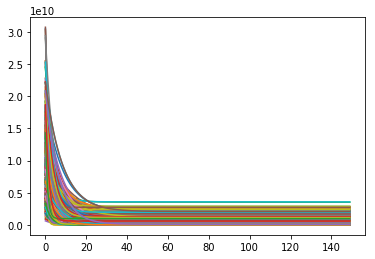

In [26]:
pred = []
for i in range(len(y)):
    cost_list, w = gradient_descend(x, y, alpha=0.01, x1=x.iloc[i,:], iterations=150, t = 1/100)
    plt.plot(cost_list)
    #print(cost_list[-1])
    #print(w)
    pred.append(np.matmul(x.iloc[i,:],w)[0])
    print(y[i,0], pred[-1])

In [27]:
np.sum(np.abs(1 - ((np.array(pred).reshape(-1,1))/ y))) * 100 / len(y)

11.353332510511136

ie, average error for t = 1/100 is 11.35%

42000.0 47232.03891770162
38500.0 49370.52982034124
49500.0 44946.551293220284
60500.0 61363.99885174087
61000.0 60869.82918966777
66000.0 63258.1197591225
66000.0 65971.08130322561
69000.0 65879.67638775353
83800.0 77116.94887934644
88500.0 88566.19553089899
90000.0 76134.0371016085
30500.0 37077.99979094682
27000.0 34721.90704391988
36000.0 37109.42585086335
37000.0 45119.17123638864
37900.0 36429.625001485765
40500.0 44943.376229575624
40750.0 40741.07755673434
45000.0 44999.94142725617
45000.0 44978.32196150975
48500.0 52454.63233823345
65900.0 65894.38905183805
37900.0 49646.24511899747
38000.0 47552.10733922242
42000.0 45159.57232759864
42300.0 44598.21014280563
43500.0 49721.132492319666
44000.0 45159.57232759864
44500.0 41493.951280342044
44900.0 54447.120857684145
45000.0 47914.74267021782
48000.0 54999.9942417309
49000.0 49370.52982034124
51500.0 48376.739595131316
61000.0 60630.395839558085
61000.0 60926.5201930169
61700.0 50215.165801456606
67000.0 69854.41689094577
82000.0

75000.0 74766.00694629665
76900.0 77775.6211972489
78000.0 77999.89966519653
80000.0 87353.41359994354
82000.0 82010.24181532198
83000.0 82999.86908026409
83000.0 82419.93665402698
83900.0 86433.41397969995
88500.0 90618.22323420343
93000.0 92994.2271076614
98000.0 87096.0243203189
98500.0 98493.70490905133
99000.0 98960.3547261107
101000.0 100986.12799161398
110000.0 109999.98114557614
115442.0 115441.98761244852
120000.0 114752.43595830615
124000.0 123984.2776945072
175000.0 174999.99999999997
50000.0 49917.3977369194
55000.0 48845.63514912692
60000.0 59999.8577312657
61000.0 60941.84338388919
106000.0 105918.22554567401
155000.0 154999.99996495363
141000.0 140989.98985671942
62500.0 47888.21458454897
70000.0 66587.70872791861
73000.0 55747.98852958517
80000.0 78117.07748088722
80000.0 78631.38330640865
88000.0 87998.16249077613
49000.0 46763.96768529038
52000.0 51975.19653006587
59500.0 65570.712679229
60000.0 63045.5055886714
64000.0 62606.206944671314
64500.0 64495.7526841233
6850

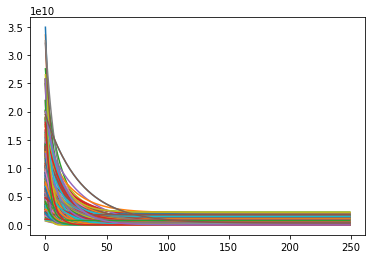

In [33]:
pred = []
for i in range(len(y)):
    cost_list, w = gradient_descend(x, y, alpha=0.005, x1=x.iloc[i,:], iterations=250, t = 1/1000)
    plt.plot(cost_list)
    pred.append(np.matmul(x.iloc[i,:],w)[0])
    print(y[i,0], pred[-1])

In [34]:
np.sum(np.abs(1 - ((np.array(pred).reshape(-1,1))/ y))) * 100 / len(y)

7.525574228735765

Error with t = 1/1000 is 7.5%